# Analysis and Visualization [<svg height="1.5rem" width="1.5rem" fill="currentColor" viewBox="0 0 16 16" aria-hidden="true" xmlns="http://www.w3.org/2000/svg" class="Icon__StyledSvg-sc-6evbi1-0"><path data-testid="eds-icon-path" d="M5 3c-1.093 0-2 .907-2 2v14c0 1.093.907 2 2 2h14c1.093 0 2-.907 2-2v-7h-2v7H5V5h7V3H5Zm9 0v2h3.586l-9.293 9.293 1.414 1.414L19 6.414V10h2V3h-7Z" height="24" fill-rule="evenodd" clip-rule="evenodd" transform="scale(0.6666666666666666)" class="Icon__StyledPath-sc-6evbi1-1 jzkZsK"></path></svg>]()

After creating numerous subsets to account for various data classifications, it is now time to analyze them in way that is easily accessible to us humans.

This notebook covers the following topics:

- [Getting the notebook ready](#getting-the-notebook-ready)
- [Annual Production](#annual-production)
  - [Relationship between oil and water production](#relationship-between-oil-and-water-production)
- [Monthly Production](#monthly-production)
- [Wellbores Production](#wellbores-production)
- [Individual Performances](#individual-performances)
  - [Production wells](#production-wells)
  - [Injection wells](#injection-wells)
- [Case study: Well 15/9-F-5](#case-study:-well-15/9-F-5)
- [Chronology of Events](#chronology-of-events)

>**Note:** To avoid having to copy all the functions created in the previous notebook, a `functions.py` file was created to be used as a module in this notebook.

## Getting the notebook ready

In [1]:
import functions as fn
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#0000"

In [3]:
volve_df = pd.read_excel(io="raw-data/Volve production data.xlsx", sheet_name="Monthly Production Data")

In [4]:
volve_df = fn.clean_data(data=volve_df)

## Annual Production

In [5]:
annual_production_df, annual_injection_df = (fn.generate_annual_dataframes(volve_df).get(key) for key in ("production", "injection"))

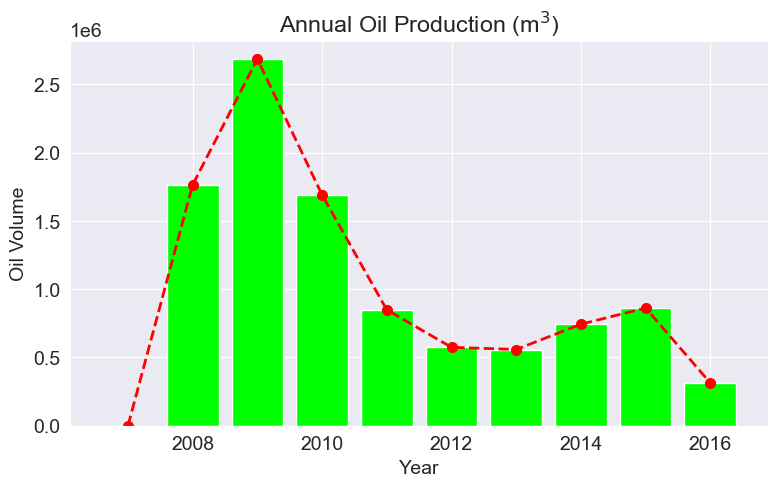

In [6]:
plt.bar(annual_production_df.YEAR, annual_production_df.OIL, color="lime")
plt.plot(annual_production_df.YEAR, annual_production_df.OIL, "o--r", lw=2, ms=7)

plt.xlabel("Year")
plt.ylabel("Oil Volume")

plt.title("Annual Oil Production (m$^3$)");

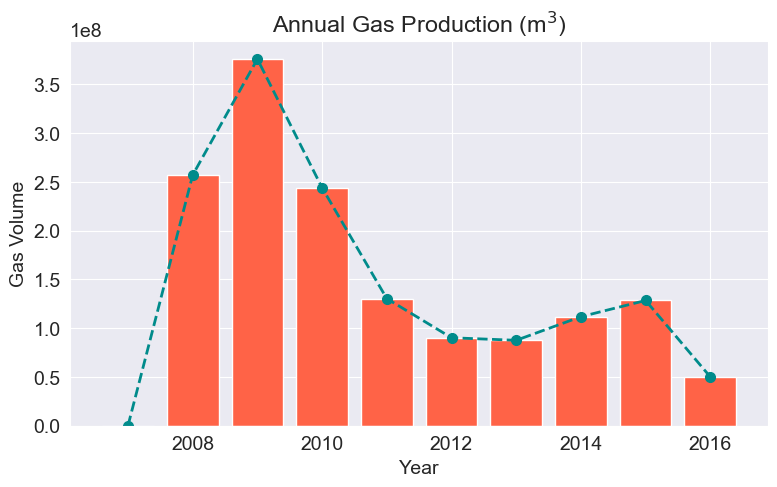

In [7]:
plt.bar(annual_production_df.YEAR, annual_production_df.GAS, color="tomato")
plt.plot(annual_production_df.YEAR, annual_production_df.GAS, color="darkcyan", ls="--", lw=2, marker="o", ms=7)

plt.xlabel("Year")
plt.ylabel("Gas Volume")

plt.title("Annual Gas Production (m$^3$)");

### Observations

- Hydrocarbon production started in the year **2008**
- There was a peak in the production in **2009**, before drastically declining for the following four (04) years
- The graphs show a slight increase in production between **2014** and **2015**

### Questions

- What can justify the sudden decline in production after **2009**?
- What could be the reason behind the increase in production between **2014** and **2015**?

>**Hint:** A strategy for supplying extra energy is established when crude oil in the reservoir cannot be collected using conventional techniques. This is known as [secondary recovery](https://www.britannica.com/technology/petroleum-production/Recovery-of-oil-and-gas#ref623983). Gas or water is injected into the reservoir to replenish produced fluids, maintaining or raising the reservoir's pressure.

### Relationship between oil and water production

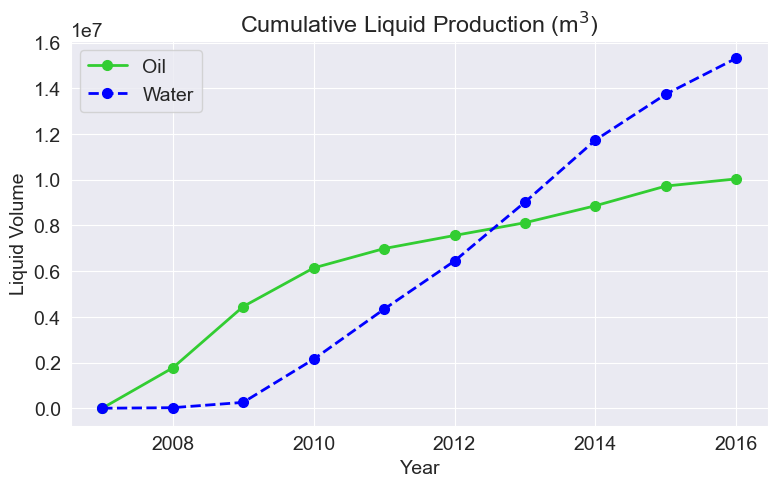

In [8]:
plt.plot(annual_production_df.YEAR, annual_production_df.CUM_OIL, color="limegreen", ls="-", lw=2, marker="o", ms=7, label="Oil")
plt.plot(annual_production_df.YEAR, annual_production_df.CUM_WATER, "o--b", lw=2, ms=7, label="Water")

plt.xlabel("Year")
plt.ylabel("Liquid Volume")
plt.legend()

plt.title("Cumulative Liquid Production (m$^3$)");

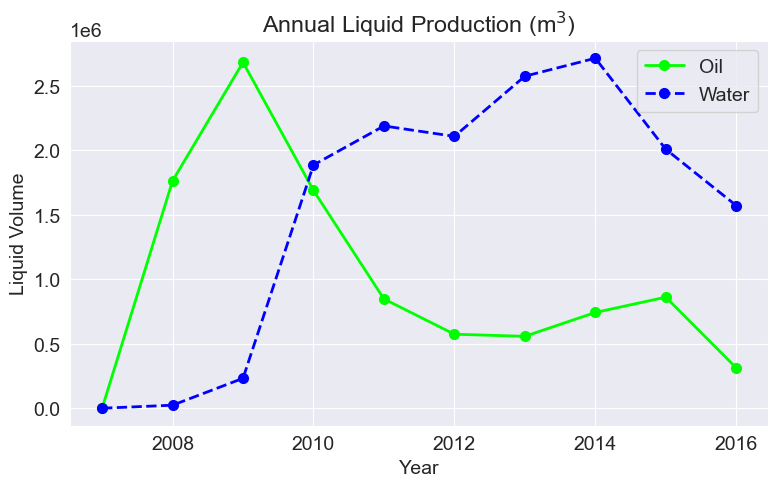

In [9]:
plt.plot(annual_production_df.YEAR, annual_production_df.OIL, color="lime", ls="-", lw=2, marker="o", ms=7, label="Oil")
plt.plot(annual_production_df.YEAR, annual_production_df.WATER, "o--b", lw=2, ms=7, label="Water")

plt.xlabel("Year")
plt.ylabel("Liquid Volume")
plt.legend()

plt.title("Annual Liquid Production (m$^3$)");

The above graphs depict a decrease in oil production as more water is produced from the reservoir.

As the most efficient [natural drive mechanism](https://wiki.aapg.org/Drive_mechanisms_and_recovery), water drive generally contributes **35-75%** recovery. So when water is produced from the reservoir, the amount of water present in the aquifer to displace the oil is reduced, resulting in the depletion of the aquifer's strength and a drop in the reservoir's pressure. This highlights the importance of secondary recovery to ensure a continued hydrocarbon production.

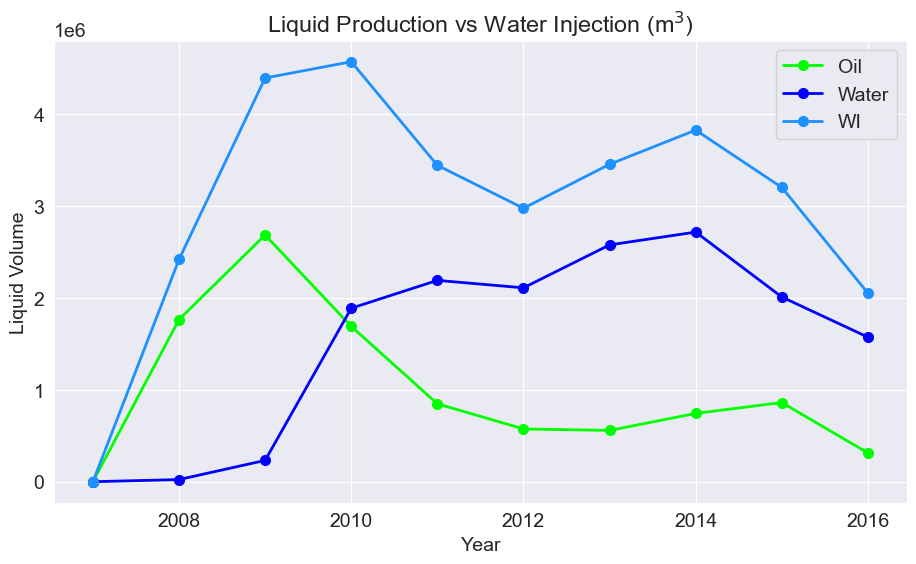

In [10]:
plt.figure(figsize=(11, 6))

plt.plot(annual_production_df.YEAR, annual_production_df.OIL, color="lime", lw=2, marker="o", ms=7, label="Oil")
plt.plot(annual_production_df.YEAR, annual_production_df.WATER, color="blue", lw=2, marker="o", ms=7, label="Water")
plt.plot(annual_injection_df.YEAR, annual_injection_df.WI, color="dodgerblue", lw=2, marker="o", ms=7, label="WI")

plt.xlabel("Year")
plt.ylabel("Liquid Volume")
plt.legend()

plt.title("Liquid Production vs Water Injection (m$^3$)");

### Observations

#### Period: 2008 - 2009

- Increasing oil production volumes
- Very low water production volumes
- Injected water provides a good sweep efficiency

**Interpretation:** Produced water originates from the natural aquifer.

### Period 2009 - 2010

- Drastic decline of oil production volumes
- Increasing water production
- Increasing water injection

**Interpretation:** Injected water started channelling into production wellbores and was produced along with oil, decreasing the sweep efficiency.

#### Period 2011 - 2013

- Similar to `2009 - 2010` but with lesser water injection volumes.

#### Period 2013 - 2014

- Increased water production and injection
- Increased hydrocarbon production

#### Period 2014 - 2015

- Increased oil production
- Decline in water production and injection

### Answers

- The decline in production from **2010** to **2013** was due to the water breakthrough.

- In the previous notebook, we discovered that the field's proved reserves had increased thank to a successful exploration pilot, which led the company to increase the production in order to maximize its profits. This was accomplished by the drilling of three (03) new production wellbores between `2013` and `2014`.

### Question

- Given that oil prices started increasing from **2012**, why did the company wait until **2014** to start increasing the hydrocarbon production?

### Answer

- The Volve field observed a production decline in **2012** due to an anchor line repair as stated in the [2012 Financial statements and review 1Q](https://cdn.equinor.com/files/h61q9gi9/global/763843fb03cadd5815349a0c32e079bda16b543b.pdf?q1-2012-financial-statements-and-review-equinor.pdf). (*Page 12*)
- We could then assume that it wasn't until late **2013** that the problem was completely resolved.
- Moreover, proved reserves were only increased in **2013**, so the company had no economic reason to increase the production at that point.

[Back to Top](#analysis-and-visualization)

## Monthly Production

In [11]:
monthly_oil_production_df, monthly_gas_production_df = (fn.generate_monthly_dataframes(volve_df).get(key) for key in ("OIL", "GAS"))

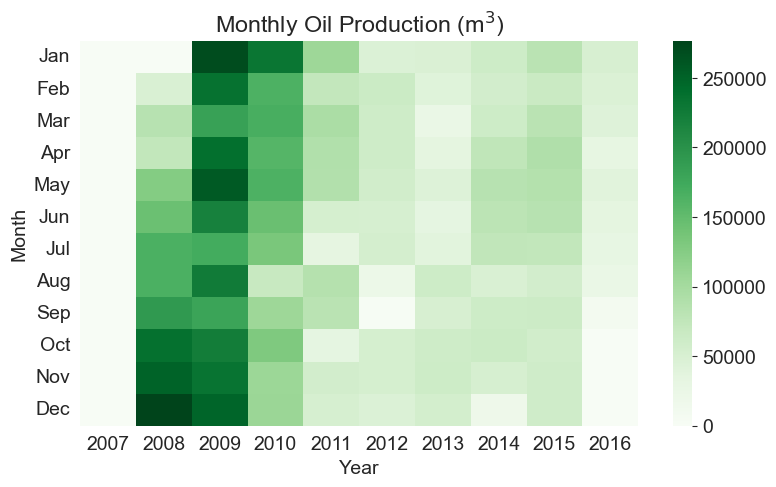

In [12]:
sns.heatmap(monthly_oil_production_df, cmap="Greens")

# This is not necessary for heatmaps but it will look better than having axes titles in ALL CAPS
plt.xlabel("Year")
plt.ylabel("Month")

plt.title("Monthly Oil Production (m$^3$)");

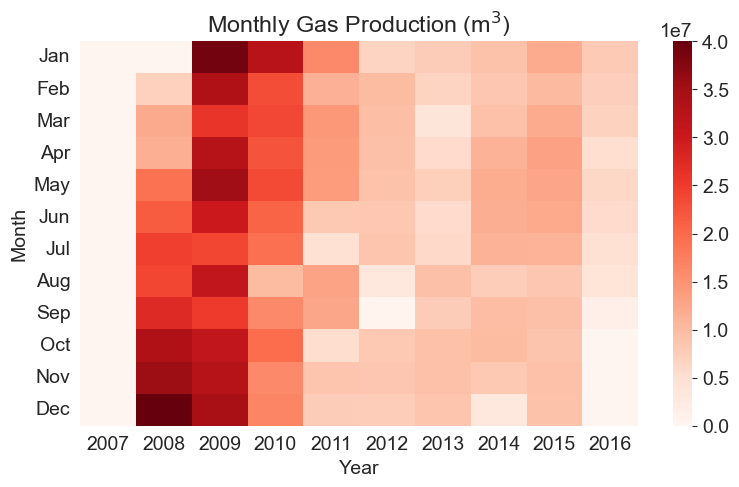

In [13]:
sns.heatmap(monthly_gas_production_df, cmap="Reds")

plt.xlabel("Year")
plt.ylabel("Month")

plt.title("Monthly Gas Production (m$^3$)");

### Observations

- Hydrocarbon production started declining in **April 2008**, only two (02) months after the beginning of production operations.
- The hydrocarbon production started exactly in **February 2008** and ended in **September 2016**.
- The highest recorded production was in **December 2008**.

**Interpretation:** We could then assume that waterflooding started in **April 2008**.

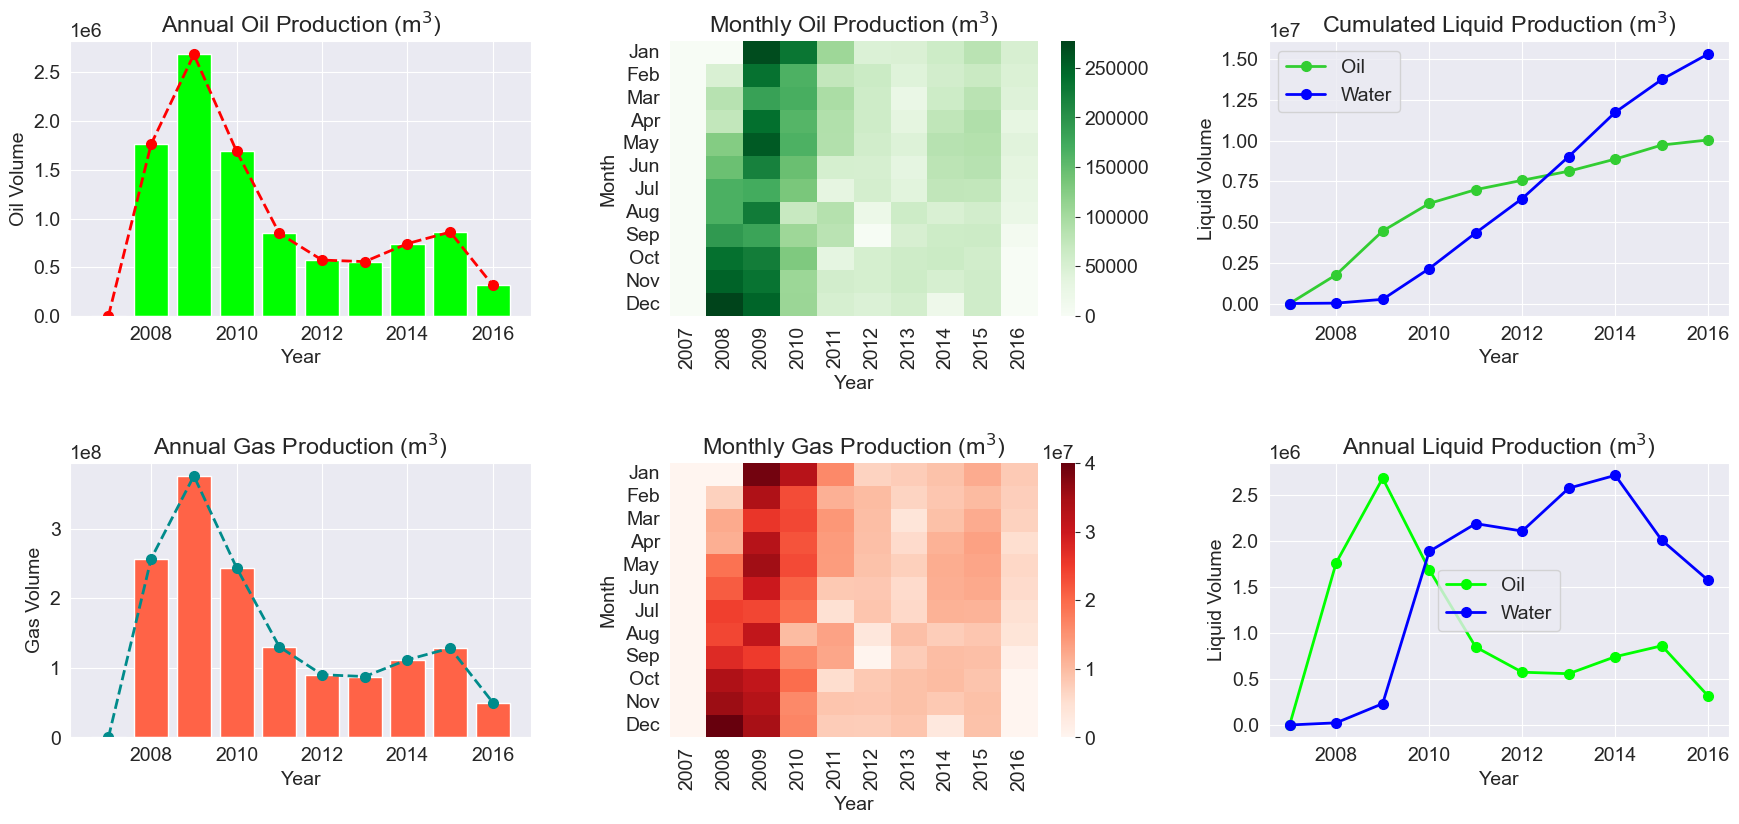

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))

axes[0, 0].bar(annual_production_df.YEAR, annual_production_df.OIL, color="lime")
axes[0, 0].plot(annual_production_df.YEAR, annual_production_df.OIL, "o--r", lw=2, ms=7)
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Oil Volume")
axes[0, 0].set_title("Annual Oil Production (m$^3$)")

sns.heatmap(monthly_oil_production_df, cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Month")
axes[0, 1].set_title("Monthly Oil Production (m$^3$)")

axes[0, 2].plot(annual_production_df.YEAR, annual_production_df.CUM_OIL, color="limegreen", lw=2, marker="o", ms=7, label="Oil")
axes[0, 2].plot(annual_production_df.YEAR, annual_production_df.CUM_WATER, "o-b", lw=2, ms=7, label="Water")
axes[0, 2].set_xlabel("Year")
axes[0, 2].set_ylabel("Liquid Volume")
axes[0, 2].legend()
axes[0, 2].set_title("Cumulated Liquid Production (m$^3$)")

axes[1, 0].bar(annual_production_df.YEAR, annual_production_df.GAS, color="tomato")
axes[1, 0].plot(annual_production_df.YEAR, annual_production_df.GAS, color="darkcyan", ls="--", lw=2, marker="o", ms=7)
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Gas Volume")
axes[1, 0].set_title("Annual Gas Production (m$^3$)")

sns.heatmap(monthly_gas_production_df, cmap="Reds", ax=axes[1, 1])
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Month")
axes[1, 1].set_title("Monthly Gas Production (m$^3$)")

axes[1, 2].plot(annual_production_df.YEAR, annual_production_df.OIL, color="lime", lw=2, marker="o", ms=7, label="Oil")
axes[1, 2].plot(annual_production_df.YEAR, annual_production_df.WATER, "o-b", lw=2, ms=7, label="Water")
axes[1, 2].set_xlabel("Year")
axes[1, 2].set_ylabel("Liquid Volume")
axes[1, 2].legend(loc="center")
axes[1, 2].set_title("Annual Liquid Production (m$^3$)")

plt.tight_layout(pad=2)

[Back to Top](#analysis-and-visualization)

## Wellbores Production

### Questions

- Which wellbore produced the highest amount of hydrocarbons?
- Which wellbore produced the lowest amount of hydrocarbons?

In [15]:
wellbores_df, production_wells_df, injection_wells_df = fn.generate_wellbores_dataframes(volve_df).values()

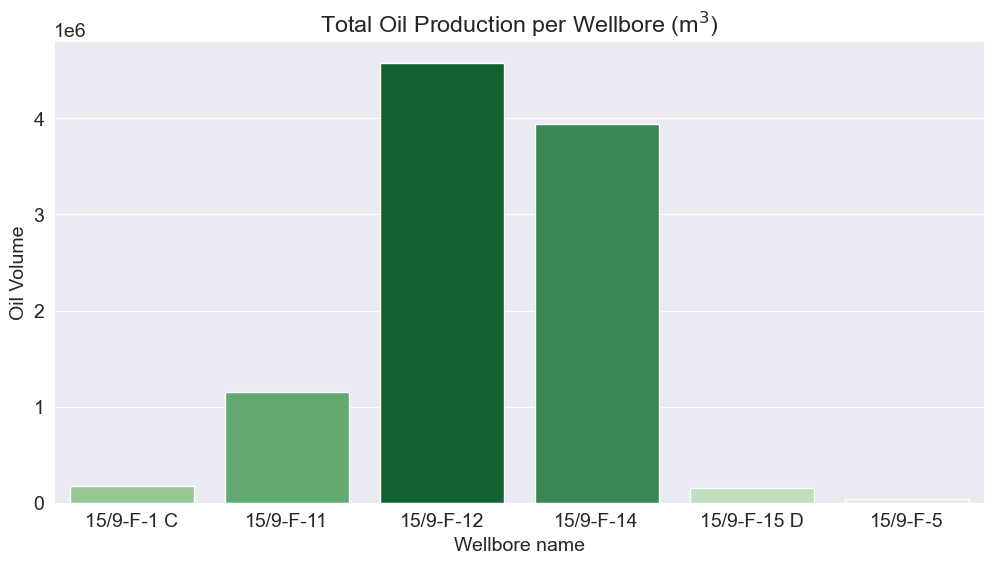

In [16]:
plt.figure(figsize=(12, 6))

sns.barplot(x="WELLBORE_NAME", y="OIL", hue="OIL", palette="Greens", dodge=False, data=production_wells_df).legend_.remove()

plt.xlabel("Wellbore name")
plt.ylabel("Oil Volume")

plt.title("Total Oil Production per Wellbore (m$^3$)");

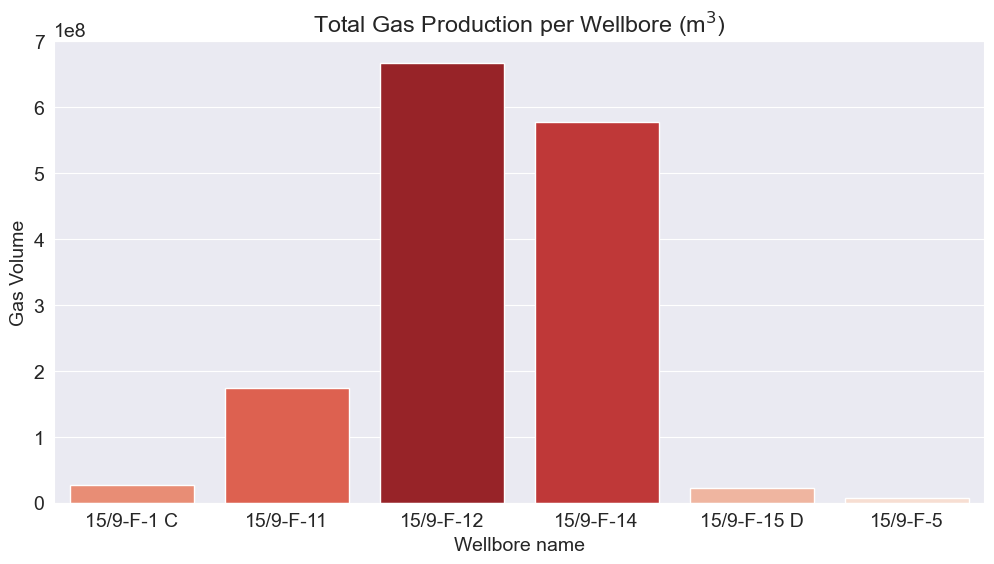

In [17]:
plt.figure(figsize=(12, 6))

sns.barplot(x="WELLBORE_NAME", y="GAS", hue="GAS", palette="Reds", dodge=False, data=production_wells_df).legend_.remove()

plt.xlabel("Wellbore name")
plt.ylabel("Gas Volume")

plt.title("Total Gas Production per Wellbore (m$^3$)");

### Answers

- The wellbore `15/9-F-12` produced the highest amount of hydrocarbons.
- The wellbore `15/9-F-5` produced the lowest amount of hydrocarbons. (*This is because it was used for both production and injection*)

>We could then assume that the poor performance of the wellbore `15/9-F-5` was due to it being used mainly for water injection. However, instead of speculating, let's have a closer look by analyzing injection wells.

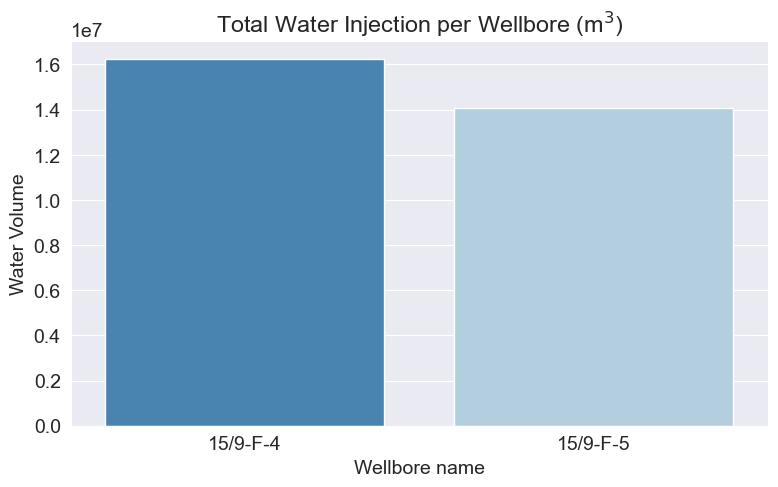

In [18]:
sns.barplot(x="WELLBORE_NAME", y="WI", hue="WI", palette="Blues", dodge=False, data=injection_wells_df).legend_.remove()

plt.xlabel("Wellbore name")
plt.ylabel("Water Volume")

plt.title("Total Water Injection per Wellbore (m$^3$)");

### Observation

- The wellbore `15/9-F-5` injected way more water than it produced hydrocarbons, which implies that its primary purposes was to aid in secondary recovery through waterflooding.

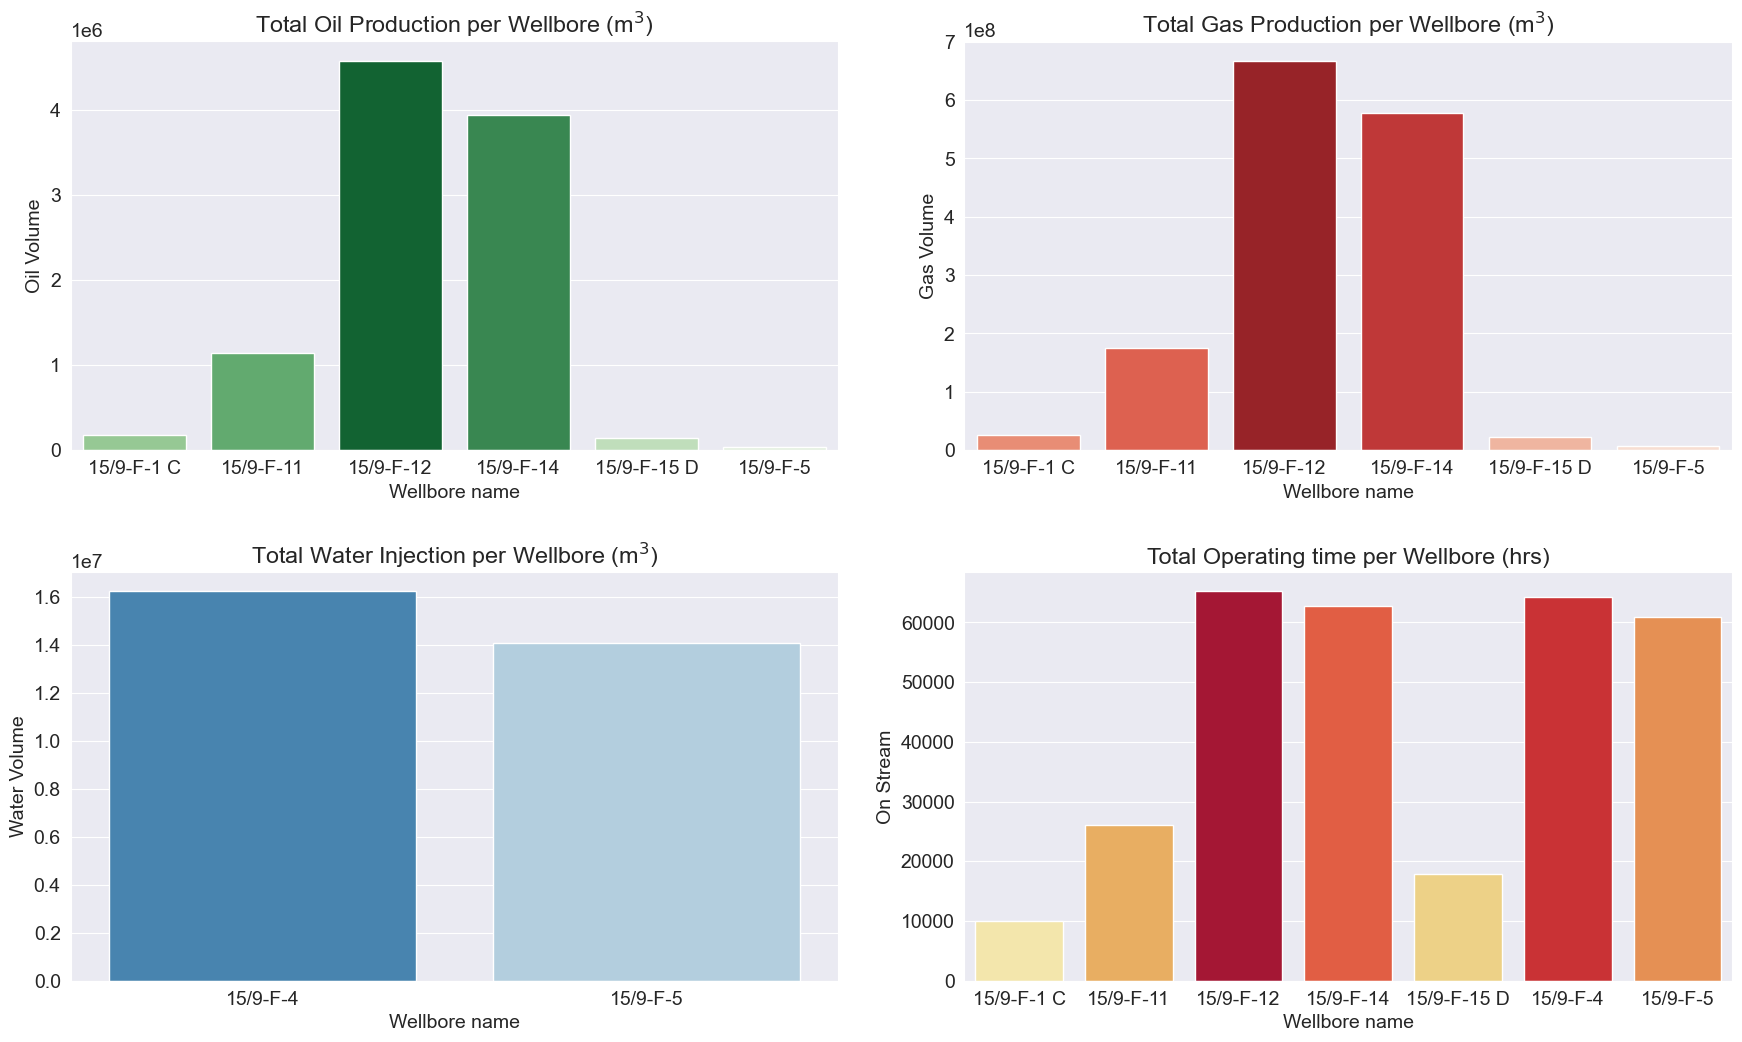

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))

sns.barplot(x="WELLBORE_NAME", y="OIL", hue="OIL", palette="Greens", dodge=False, data=production_wells_df, ax=axes[0, 0]).legend_.remove()
axes[0, 0].set_xlabel("Wellbore name")
axes[0, 0].set_ylabel("Oil Volume")
axes[0, 0].set_title("Total Oil Production per Wellbore (m$^3$)")

sns.barplot(x="WELLBORE_NAME", y="GAS", hue="GAS", palette="Reds", dodge=False, data=production_wells_df, ax=axes[0, 1]).legend_.remove()
axes[0, 1].set_xlabel("Wellbore name")
axes[0, 1].set_ylabel("Gas Volume")
axes[0, 1].set_title("Total Gas Production per Wellbore (m$^3$)")

sns.barplot(x="WELLBORE_NAME", y="WI", hue="WI", palette="Blues", dodge=False, data=injection_wells_df, ax=axes[1, 0]).legend_.remove()
axes[1, 0].set_xlabel("Wellbore name")
axes[1, 0].set_ylabel("Water Volume")
axes[1, 0].set_title("Total Water Injection per Wellbore (m$^3$)")

sns.barplot(x="WELLBORE_NAME", y="ON_STREAM", hue="ON_STREAM", palette="YlOrRd", dodge=False, data=wellbores_df, ax=axes[1, 1]).legend_.remove()
axes[1, 1].set_xlabel("Wellbore name")
axes[1, 1].set_ylabel("On Stream")
axes[1, 1].set_title("Total Operating time per Wellbore (hrs)")

plt.tight_layout(pad=2)

[Back to Top](#analysis-and-visualization)

## Individual Performances

Now let's analyze each of the wellbores individually to get a more accurate picture of the events. Because there are seven (07) wellbores in the dataset, analyzing each one individually would be time-consuming. We will therefore proceed by creating functions to automate the process.

In [20]:
def analyze_production_wellbore(data: pd.DataFrame, well_name: str):
    
    annual_df = fn.well_annual_data(data, well_name)
    monthly_oil_production_df = fn.well_monthly_data(data, well_name, "oil")
    monthly_gas_production_df = fn.well_monthly_data(data, well_name, "gas")
    
    # To avoid getting decimal values on the x-axis while plotting the annual production
    xint = range(math.floor(min(annual_df.YEAR)), math.ceil(max(annual_df.YEAR))+1)

    fig, axes = plt.subplots(2, 2, figsize=(15, 11))

    fig.suptitle(f"Analysis of the Wellbore {well_name.upper()}", fontsize=20)

    axes[0, 0].bar(annual_df.YEAR, annual_df.OIL, color="mediumspringgreen")
    axes[0, 0].set_xlabel("Year")
    axes[0, 0].set_ylabel("Oil Volume")
    axes[0, 0].set_title("Annual Oil Production (m$^3$)")
    axes[0, 0].set_xticks(xint)

    sns.heatmap(monthly_oil_production_df, cmap="Greens", ax=axes[0, 1])
    axes[0, 1].set_xlabel("Year")
    axes[0, 1].set_ylabel("Month")
    axes[0, 1].set_title("Monthly Oil Production (m$^3$)")

    axes[1, 0].bar(annual_df.YEAR, annual_df.GAS, color="crimson")
    axes[1, 0].set_xlabel("Year")
    axes[1, 0].set_ylabel("Gas Volume")
    axes[1, 0].set_title("Annual Gas Production (m$^3$)")
    axes[1, 0].set_xticks(xint)

    sns.heatmap(monthly_gas_production_df, cmap="Reds", ax=axes[1, 1])
    axes[1, 1].set_xlabel("Year")
    axes[1, 1].set_ylabel("Month")
    axes[1, 1].set_title("Monthly Gas Production (m$^3$)")

    plt.tight_layout(pad=2)


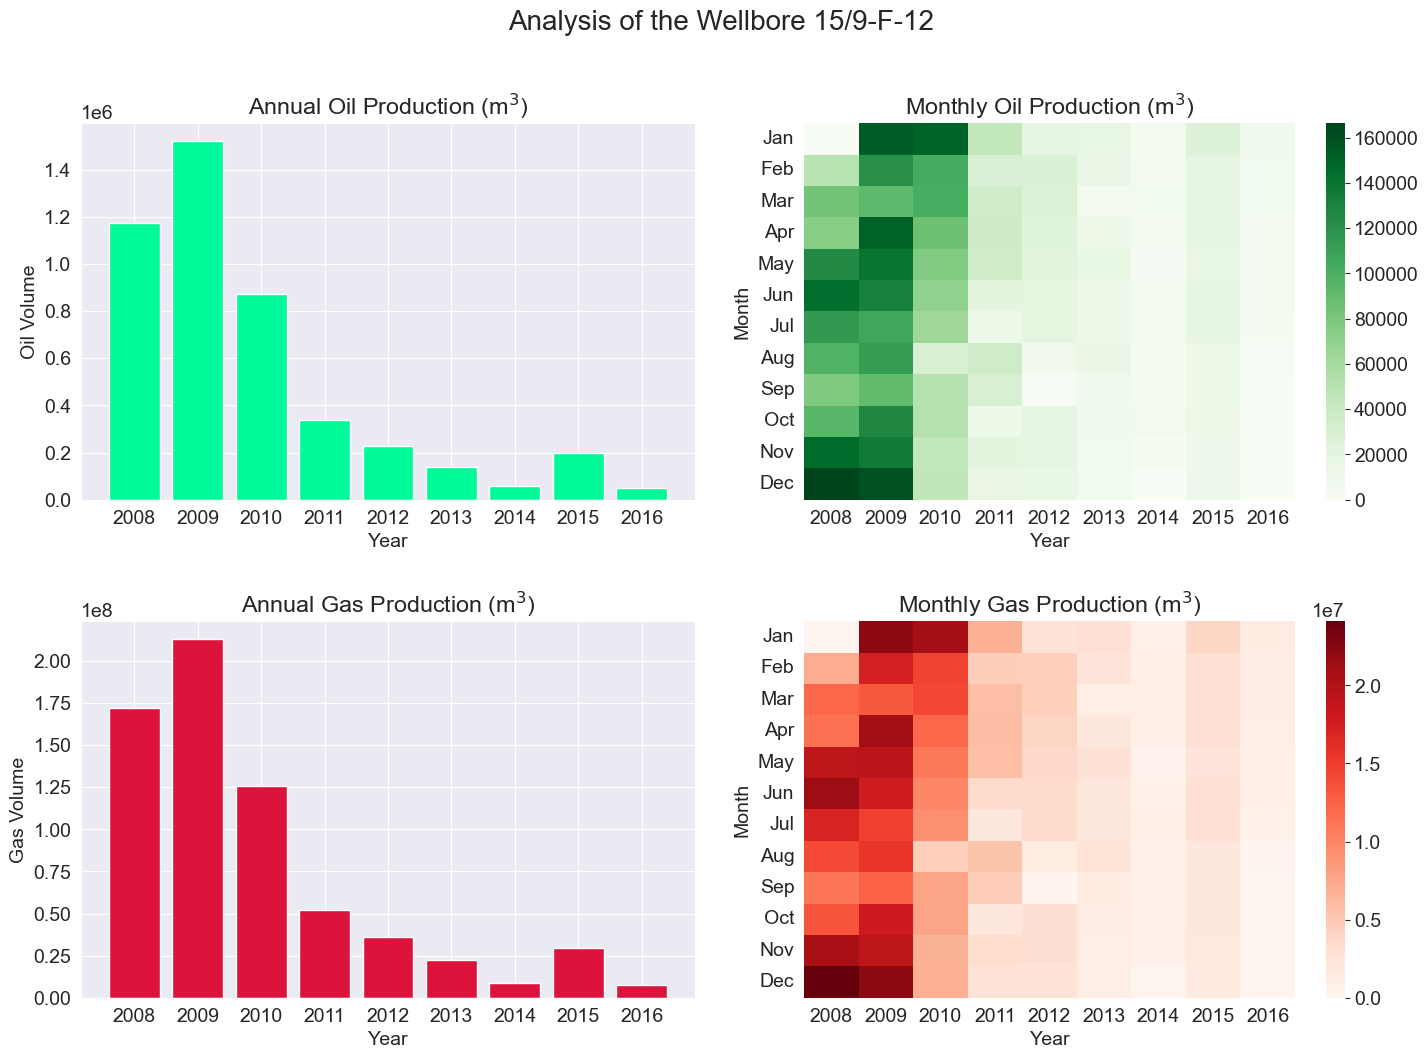

In [21]:
analyze_production_wellbore(volve_df, "15/9-f-12")

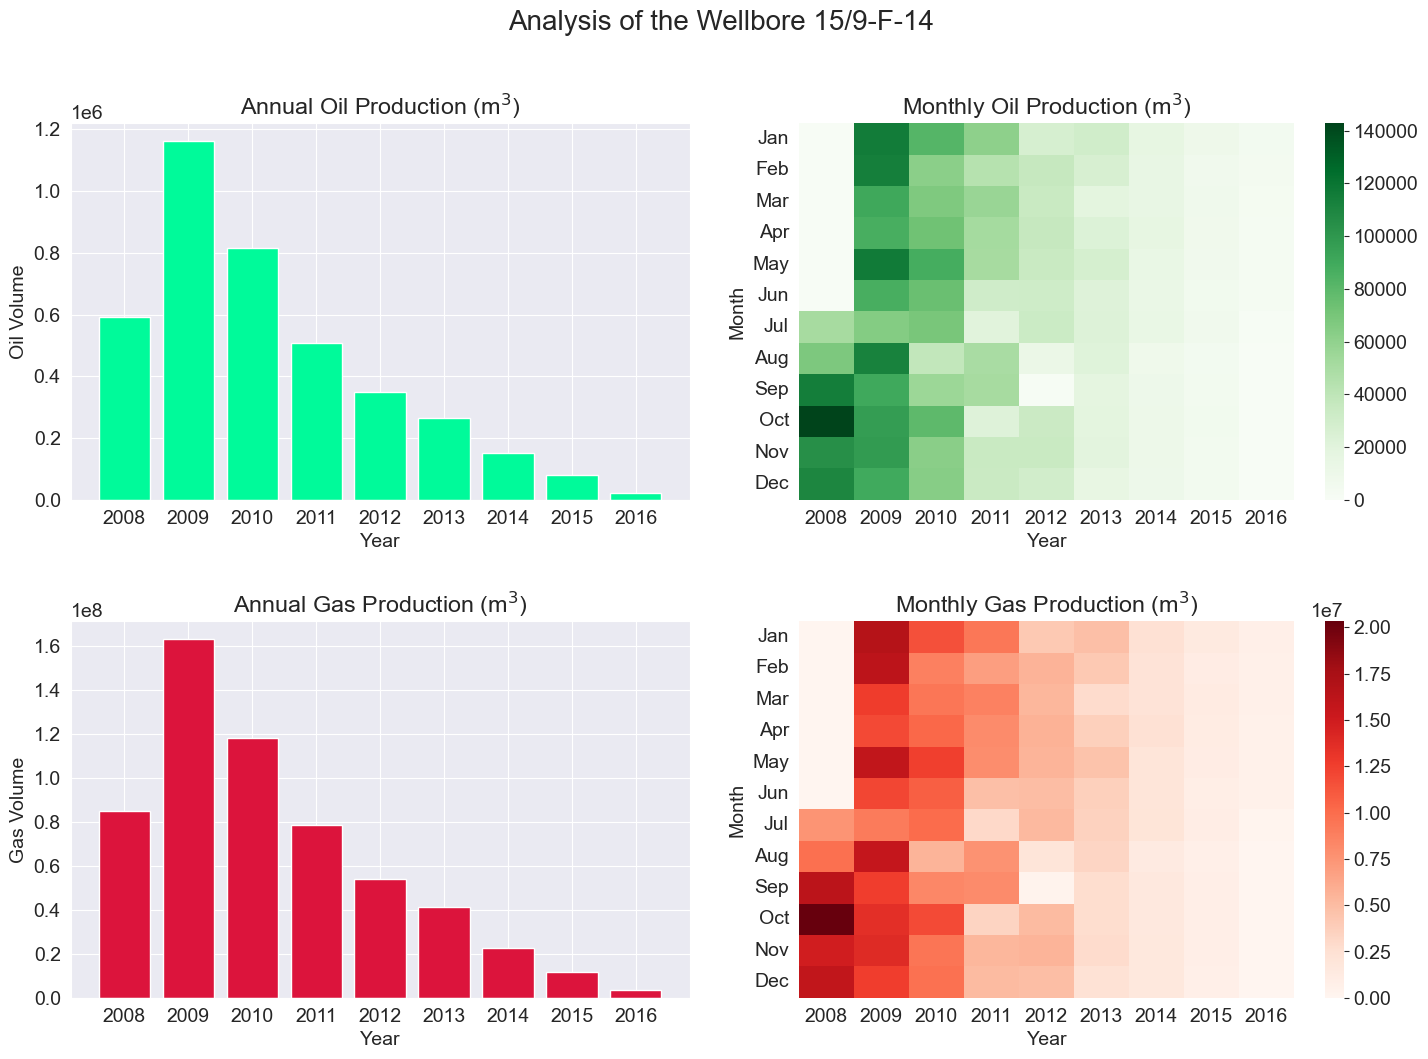

In [22]:
analyze_production_wellbore(volve_df, "15/9-f-14")

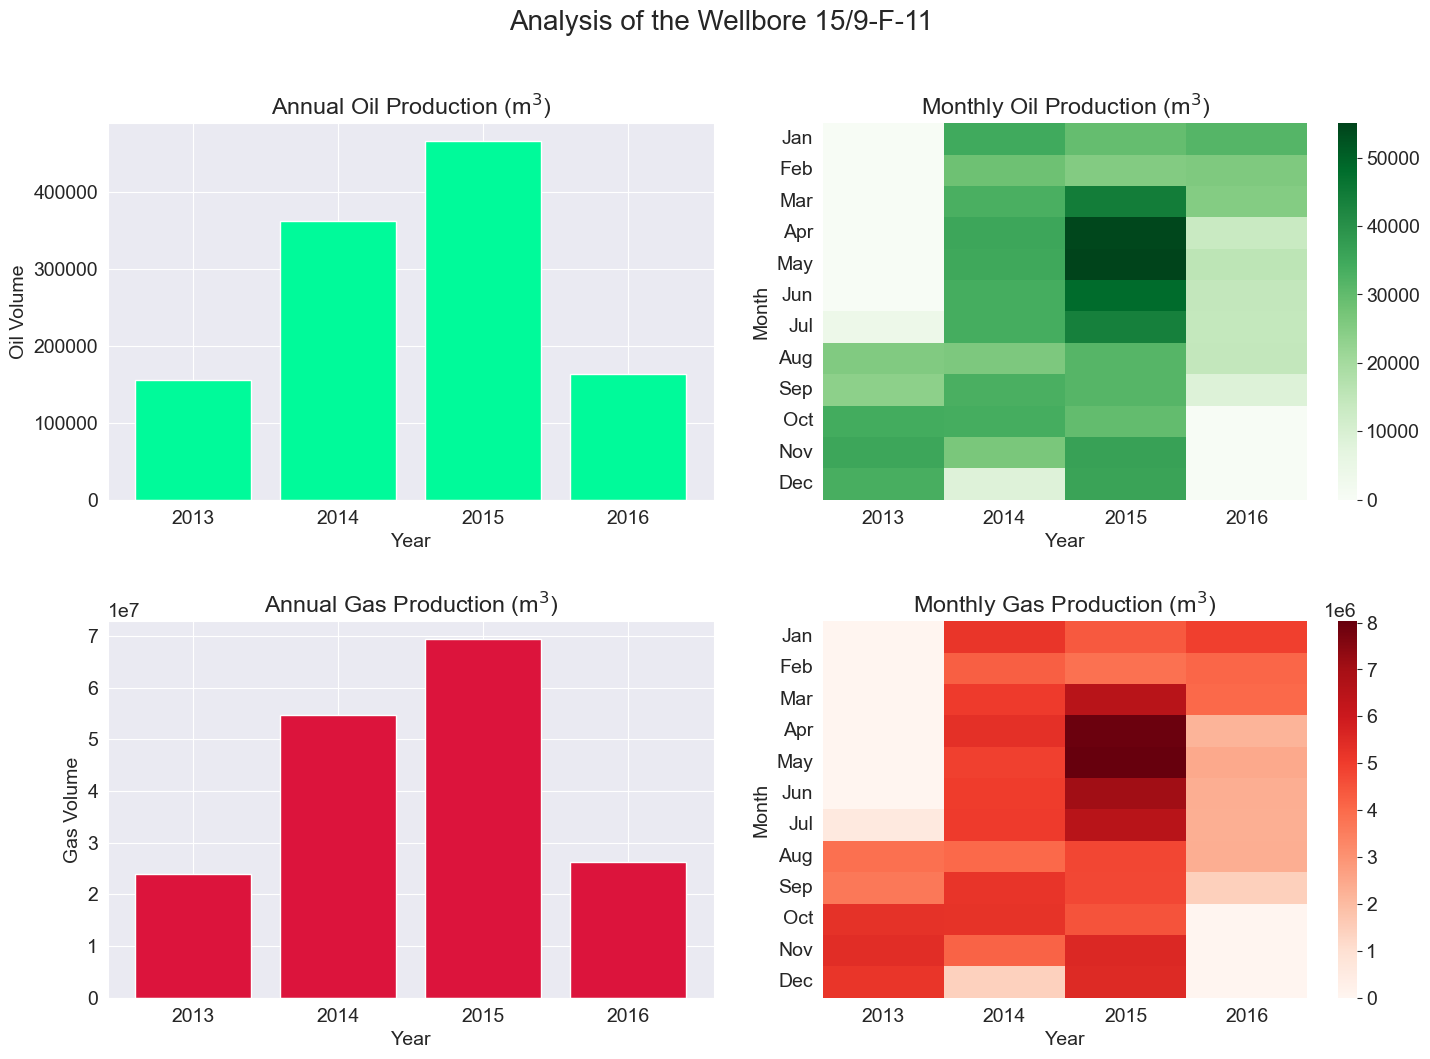

In [23]:
analyze_production_wellbore(volve_df, "15/9-f-11")

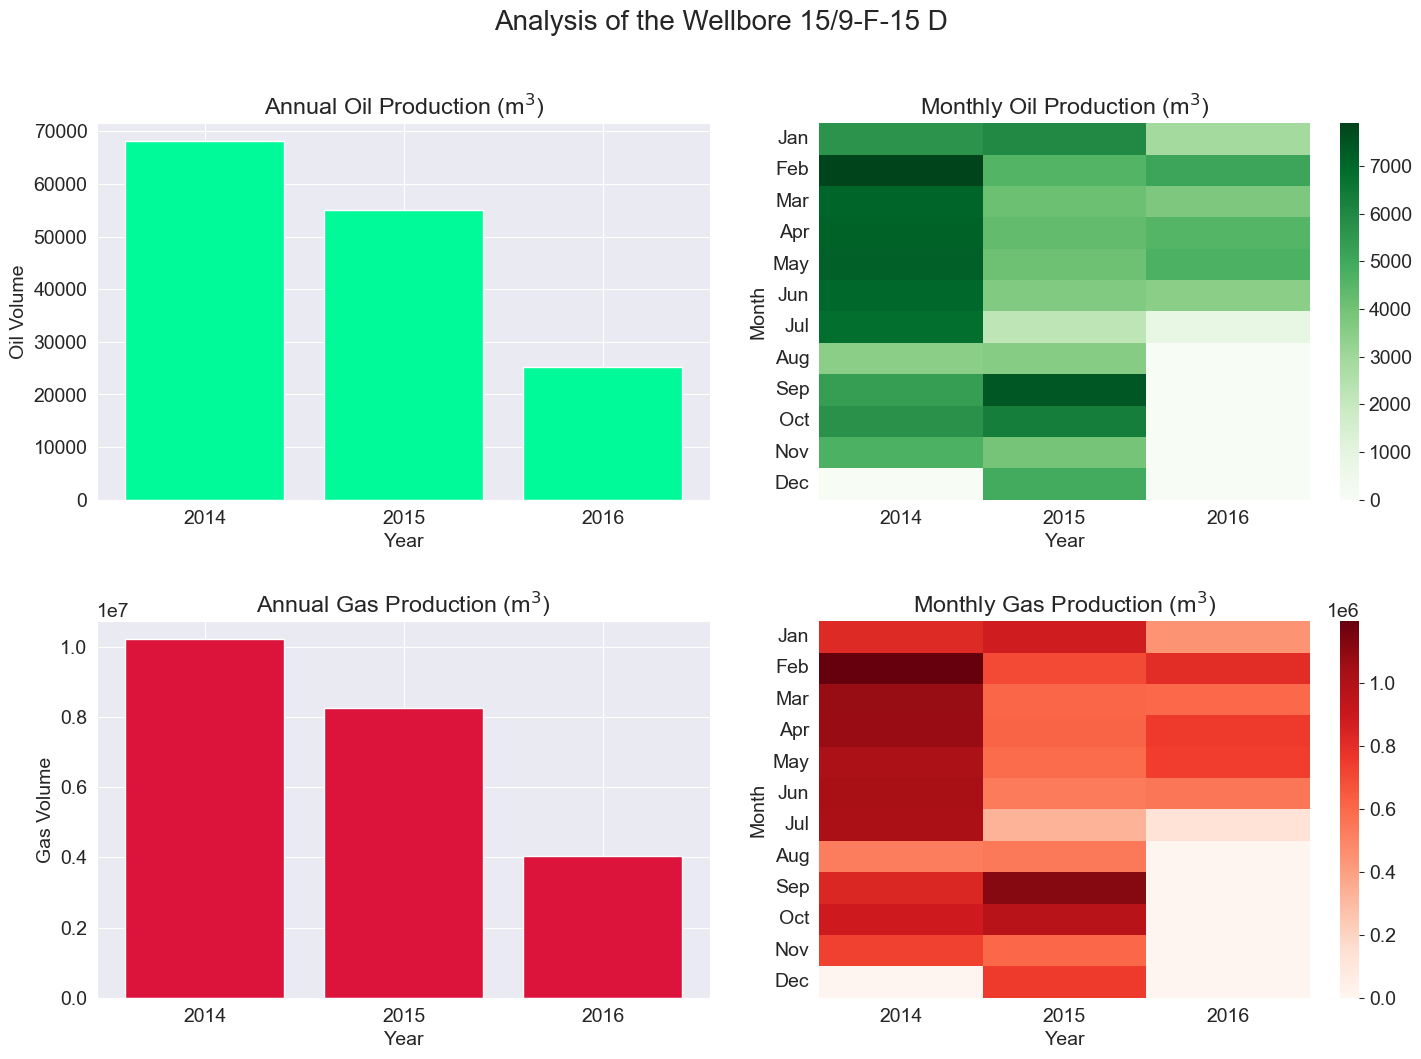

In [24]:
analyze_production_wellbore(volve_df, "15/9-f-15 D")

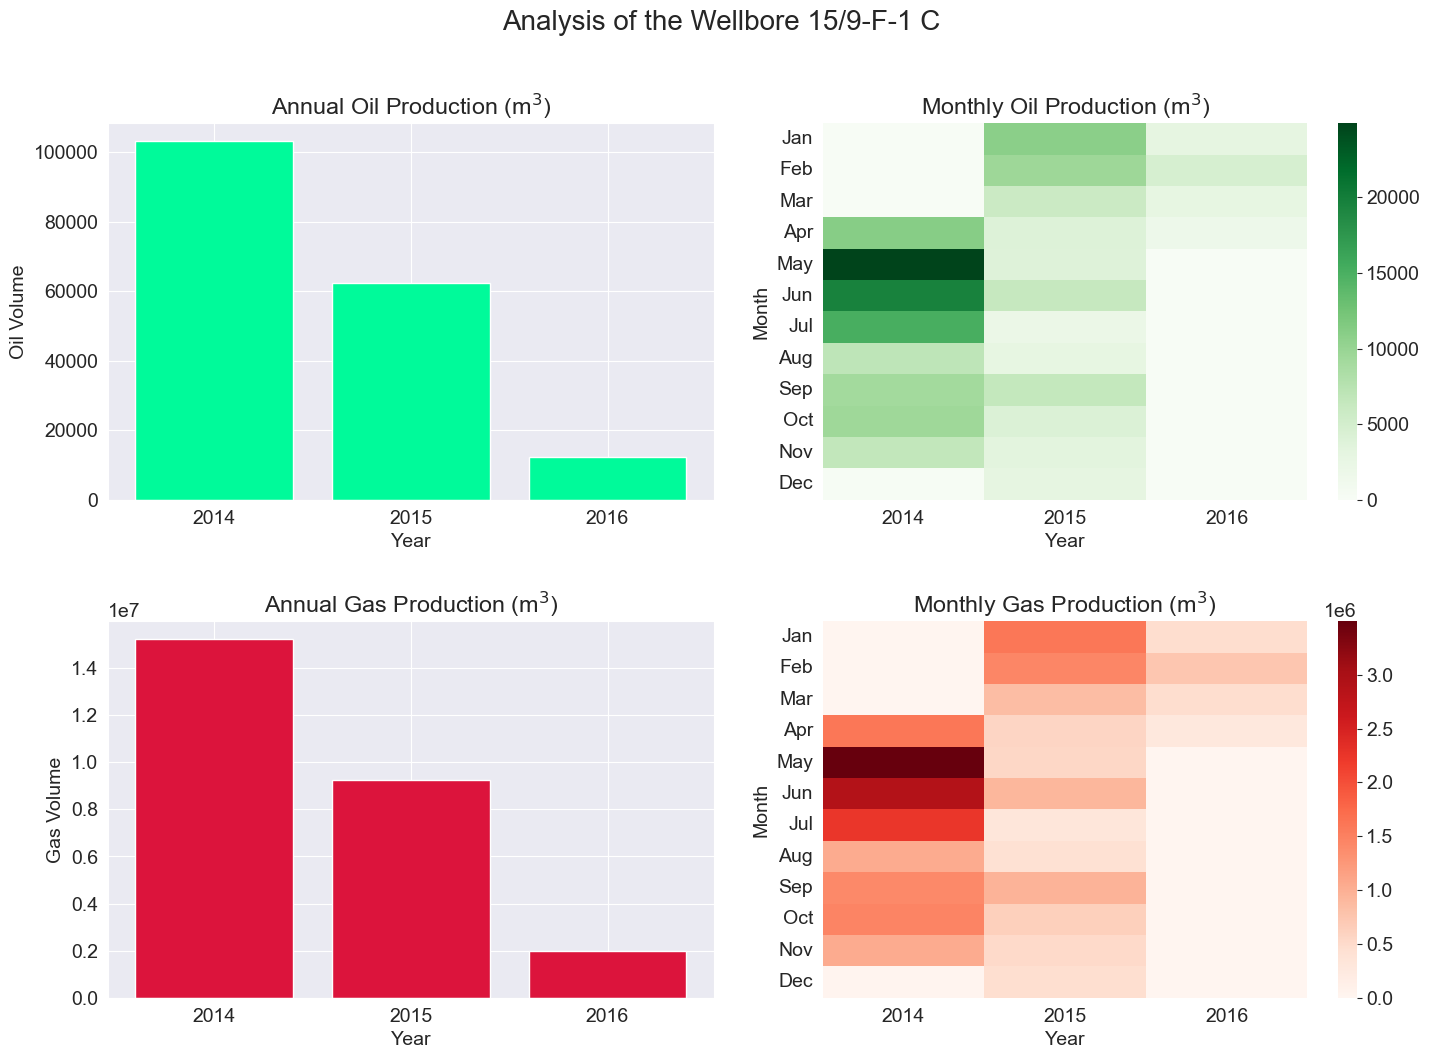

In [25]:
analyze_production_wellbore(volve_df, "15/9-f-1 c")

### Injection wells

In [26]:
def analyze_injection_wellbore(data: pd.DataFrame, well_name: str):
    annual_df = fn.well_annual_data(data, well_name)
    monthly_water_injection_df = fn.well_monthly_data(data, well_name, parameter="wi")

    fig, axes = plt.subplots(1, 2, figsize=(13, 5.4))
    
    fig.suptitle(f"Analysis of the Wellbore {well_name.upper()}", fontsize=18)

    axes[0].bar(annual_df.YEAR, annual_df.WI, color="deepskyblue")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Water Volume")
    axes[0].set_title("Annual Water Injection (m$^3$)")

    sns.heatmap(monthly_water_injection_df, cmap="Blues", ax=axes[1])
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Water Volume")
    axes[1].set_title("Monthly Water Injection (m$^3$)")

    plt.tight_layout(pad=1.25)

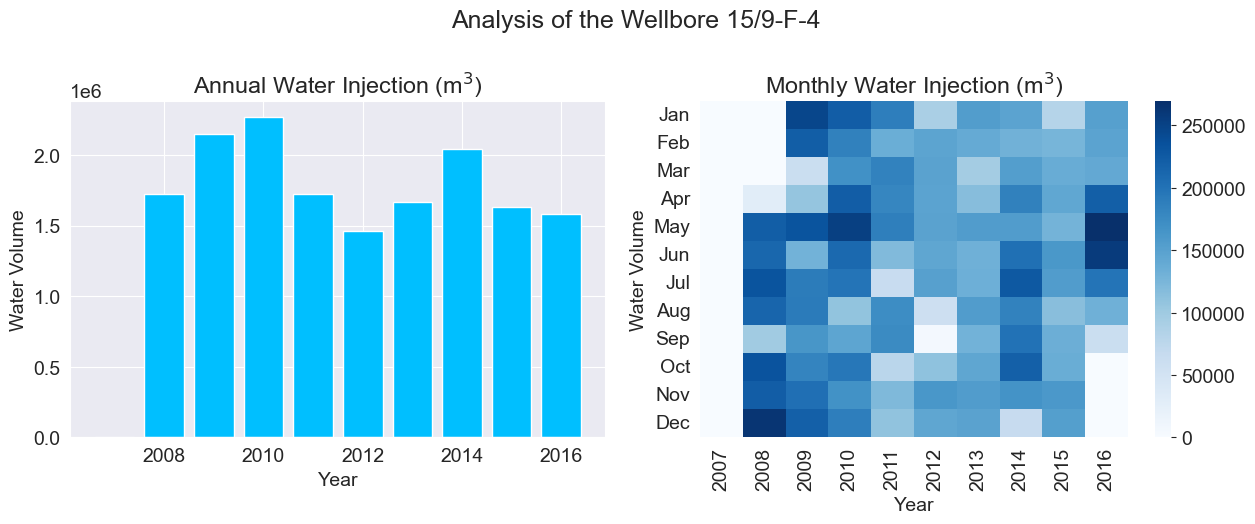

In [27]:
analyze_injection_wellbore(volve_df, "15/9-f-4")

[Back to Top](#analysis-and-visualization)

## Case study: Well 15/9-F-5

The wellbore `15/9-F-5` was used for both hydrocarbon production and water injection. However, an analysis similar to the above one wouldn't lead us to that discovery. It is thus necessary to use a slightly different approach while analyzing **hybrid wells**.

**Note:** There is not really a term in the industry to name this kind of wellbore. So I came up with the name **Hybrid well**. 

In [28]:
def analyze_hybrid_wellbore(data: pd.DataFrame, well_name: str):
    annual_df = fn.well_annual_data(data, well_name)
    monthly_oil_production_df = fn.well_monthly_data(data, well_name, parameter="oil")
    monthly_gas_production_df = fn.well_monthly_data(data, well_name, parameter="gas")
    monthly_water_injection_df = fn.well_monthly_data(data, well_name, parameter="wi")

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    fig.suptitle(f"Analysis of the Wellbore {well_name.upper()}")

    axes[0, 0].bar(annual_df.YEAR, annual_df.OIL, color="mediumspringgreen")
    axes[0, 0].set_xlabel("Year")
    axes[0, 0].set_ylabel("Oil Volume")
    axes[0, 0].set_title("Annual Oil Production (m$^3$)")

    axes[0, 1].bar(annual_df.YEAR, annual_df.GAS, color="crimson")
    axes[0, 1].set_xlabel("Year")
    axes[0, 1].set_ylabel("Gas Volume")
    axes[0, 1].set_title("Annual Gas Production (m$^3$)")

    axes[0, 2].bar(annual_df.YEAR, annual_df.WI, color="deepskyblue")
    axes[0, 2].set_xlabel("Year")
    axes[0, 2].set_ylabel("Water Volume")
    axes[0, 2].set_title("Annual Water Injection (m$^3$)")

    sns.heatmap(monthly_oil_production_df, cmap="Greens", ax=axes[1, 0])
    axes[1, 0].set_xlabel("Year")
    axes[1, 0].set_ylabel("Oil Volume")
    axes[1, 0].set_title("Monthly Oil Production (m$^3$)")

    sns.heatmap(monthly_gas_production_df, cmap="Reds", ax=axes[1, 1])
    axes[1, 1].set_xlabel("Year")
    axes[1, 1].set_ylabel("Gas Volume")
    axes[1, 1].set_title("Monthly Gas Production (m$^3$)")

    sns.heatmap(monthly_water_injection_df, cmap="Blues", ax=axes[1, 2])
    axes[1, 2].set_xlabel("Year")
    axes[1, 2].set_ylabel("Water Volume")
    axes[1, 2].set_title("Monthly Water Injection (m$^3$)")

    plt.tight_layout(pad=2)

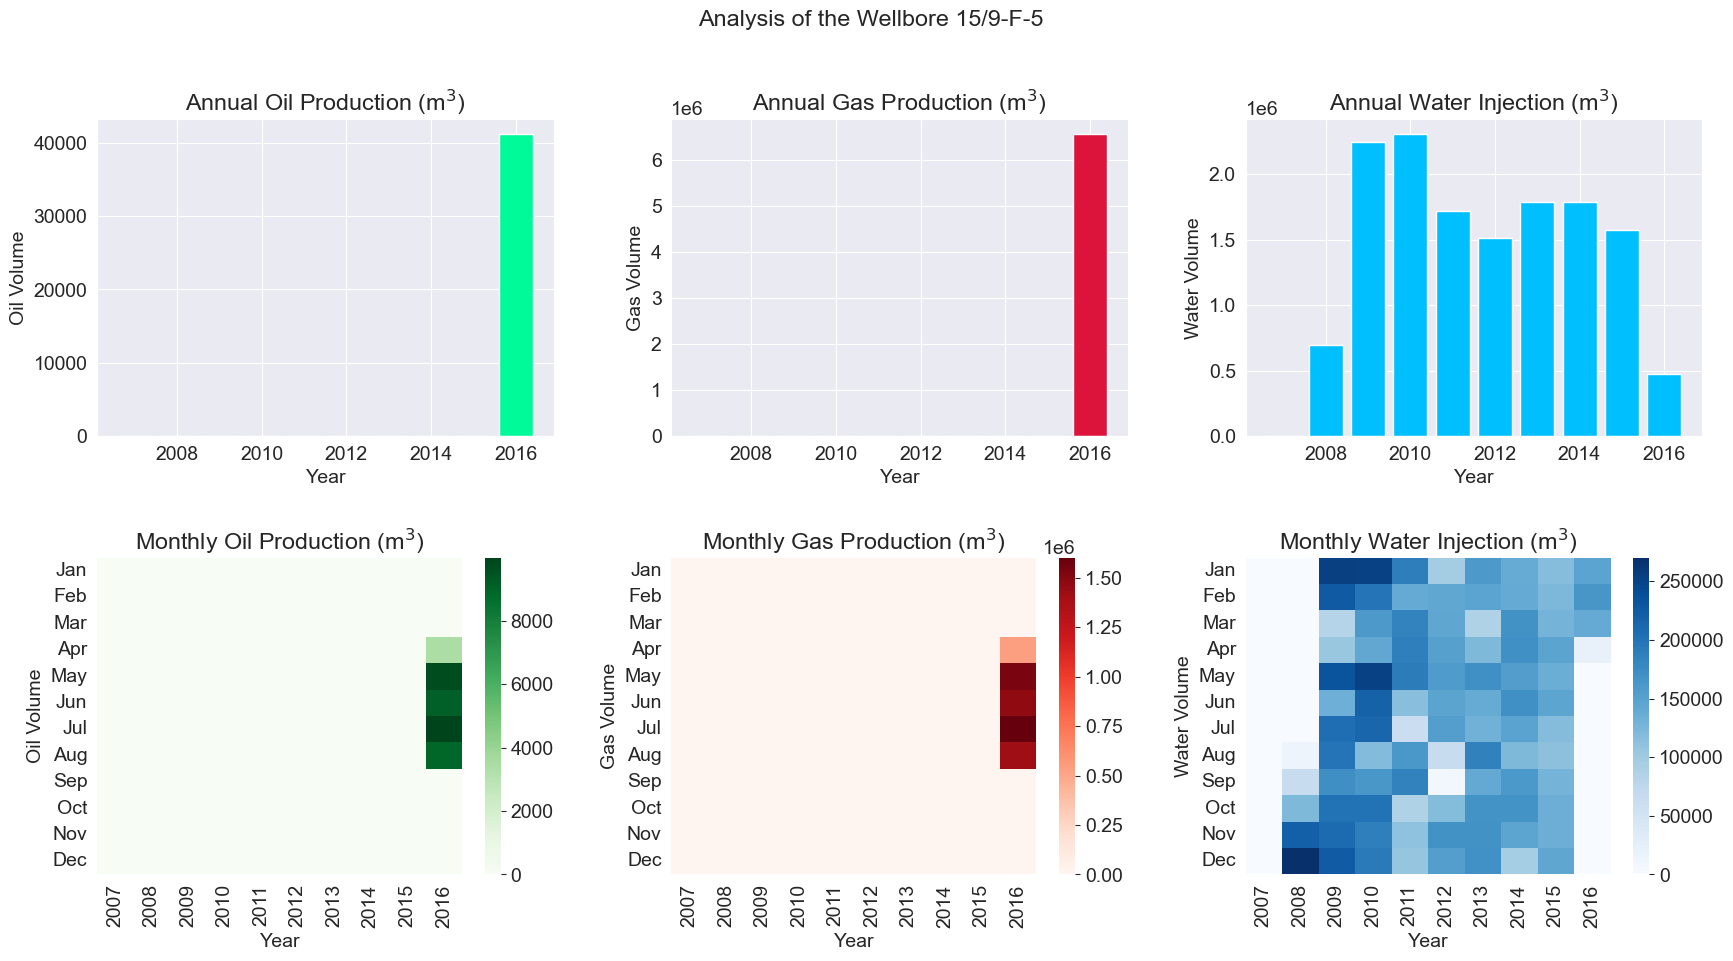

In [29]:
analyze_hybrid_wellbore(volve_df, "15/9-f-5")

#### Okay, the functions are great but what if I don't know the type of each well? 🤔 How can I be sure to select the right function?

You have a point here 😅. Indeed, there is no way to know what function would the appropriate one to call in order to analyze a particular wellbore without knowing its type in advance. Yes we could use the function `wellbores_data` to help us categorize the wellbores, but that would only add a step to our analysis. 

The goal here is to be able to get these results in a single function call without any extra step. The solution would then be to create a function that will determine the type of the wellbore, then provide its graphical analysis by calling any of the above functions depending on the type of the well.

In [30]:
def determine_well_type(data: pd.DataFrame, well_name: str) -> str:
    df = fn.well_data(data, well_name)

    if df.OIL.sum() > 0 or df.GAS.sum() > 0:
        if df.GI.sum() > 0 or df.WI.sum() > 0:
            return "hybrid"
        else:
            return "production"
    else:
        return "injection"

In [31]:
def analyze_wellbore(data: pd.DataFrame, well_name: str):
    well_type = determine_well_type(data, well_name)

    if well_type == "production":
        analyze_production_wellbore(data, well_name)
    elif well_type == "injection":
        analyze_injection_wellbore(data, well_name)
    else:
        analyze_hybrid_wellbore(data, well_name)

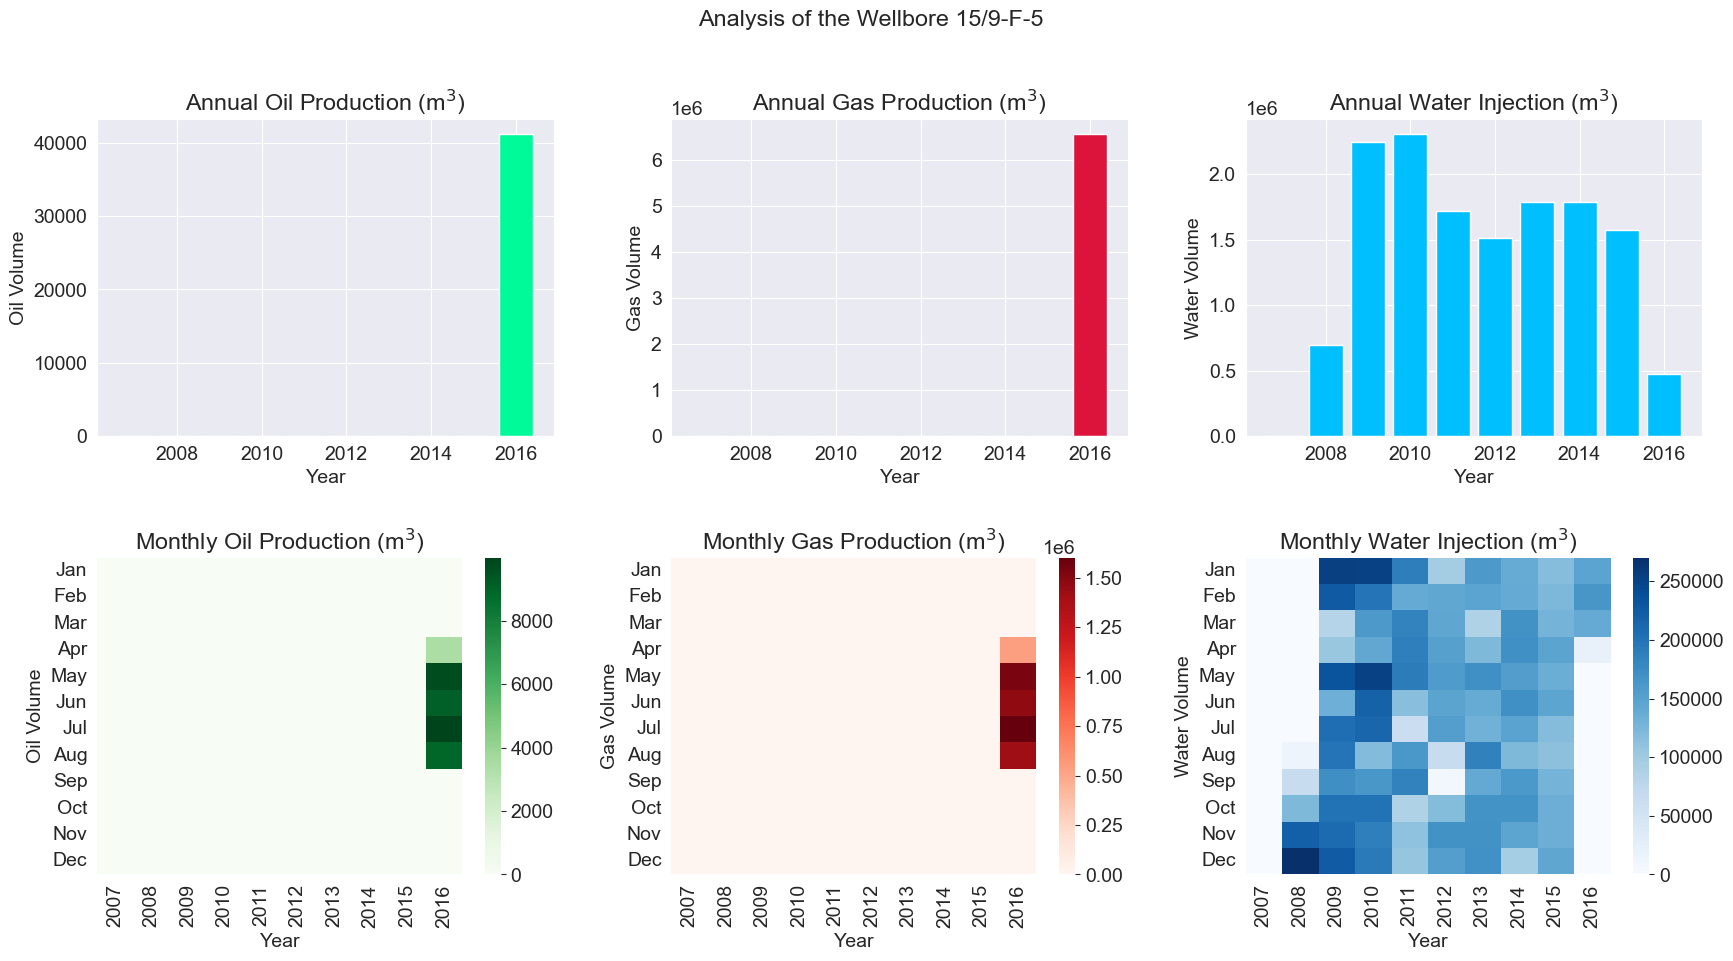

In [32]:
analyze_wellbore(data=volve_df, well_name="15/9-f-5")

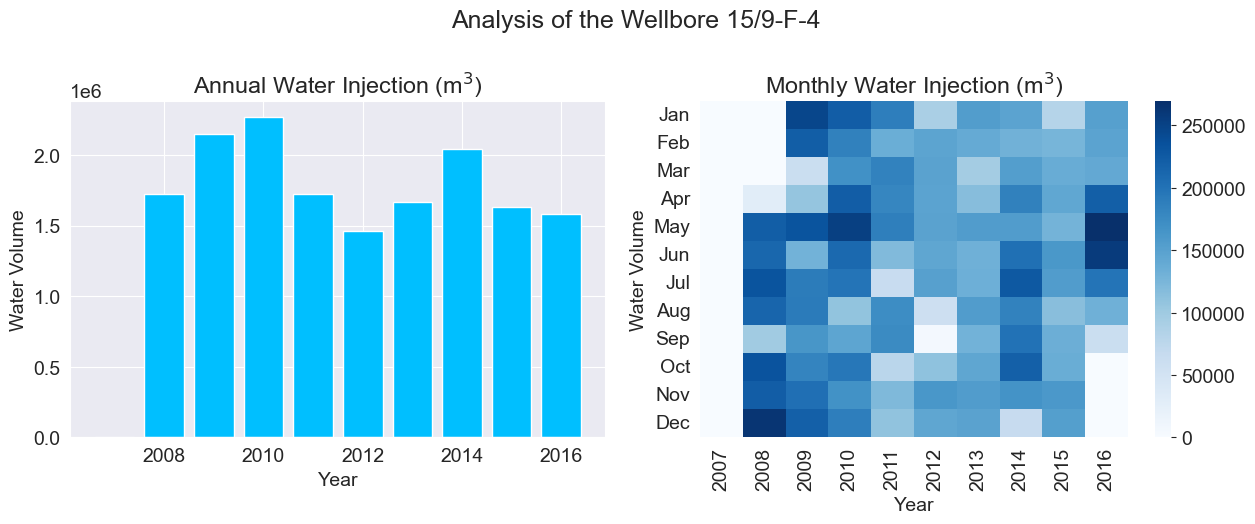

In [33]:
analyze_wellbore(data=volve_df, well_name="15/9-f-4")

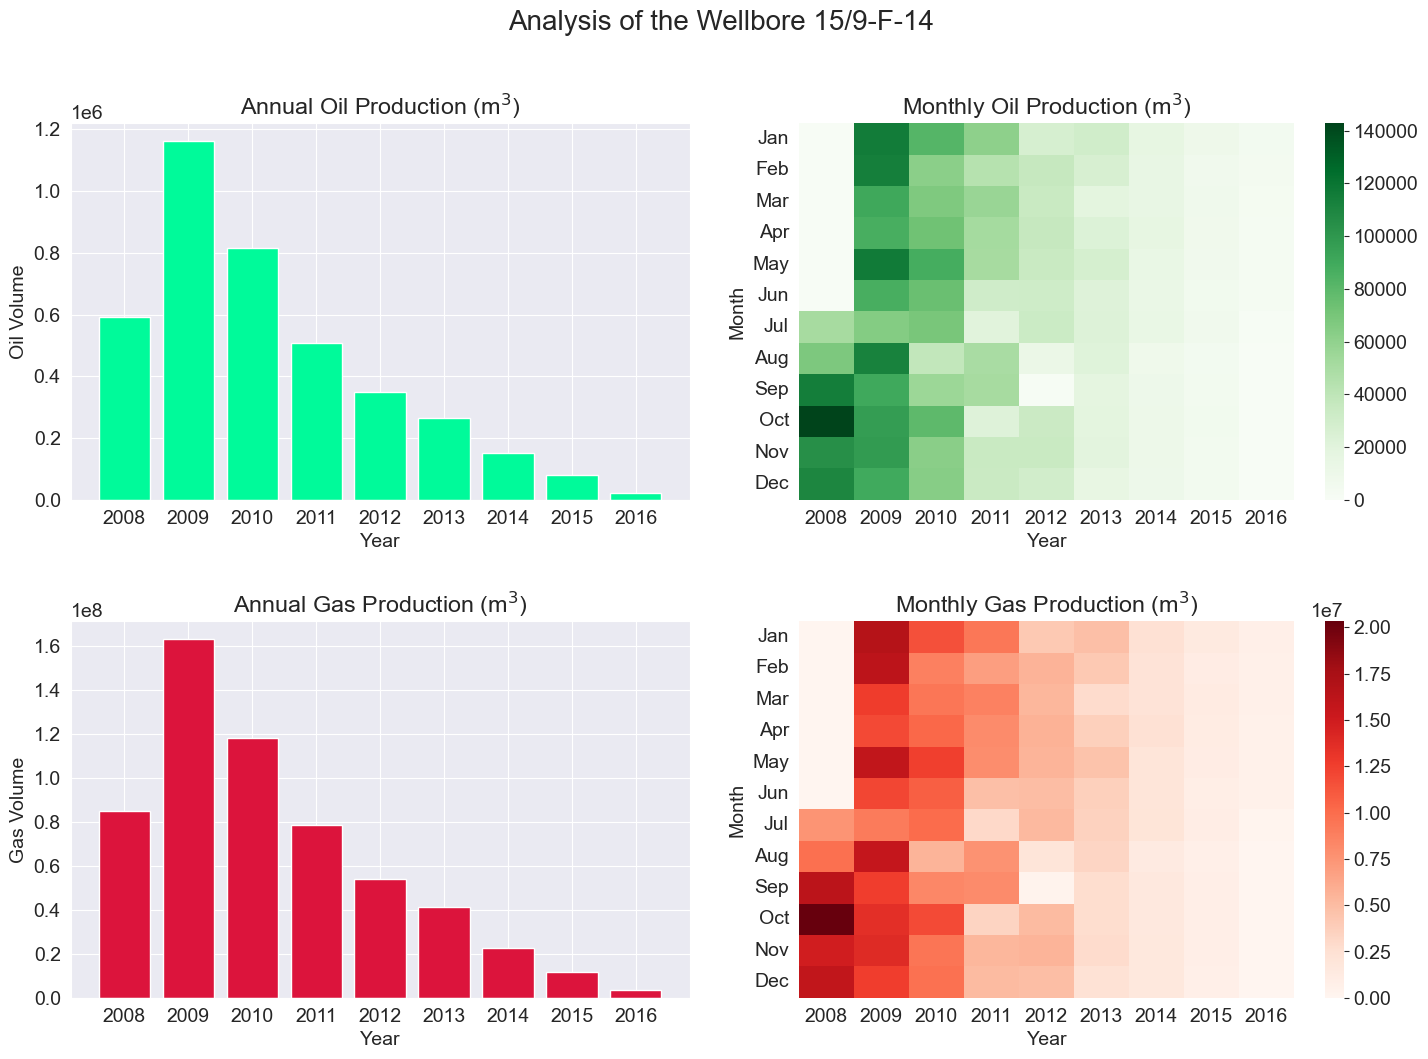

In [34]:
analyze_wellbore(data=volve_df, well_name="15/9-f-14")

[Back to Top](#analysis-and-visualization)

## Chronology of Events

### 2008
- **Feb:** Beginning of hydrocarbon production from the wellbore `15/9-F-12` <br><br>
- **Apr:** Beginning of secondary recovery via water injection from the wellbore `15/9-F-4` <br><br>
- **Jul:** The wellbore `15/9-F-14` started producing hydrocarbons <br><br>
- **Aug:** Introduction of the wellbore `15/9-F-5` to aid in water injection <br><br>

### 2013
- **Jul**: The wellbore `15/9-F-11` started producing hydrocarbons (*New wellbore*) <br><br>

### 2014
- **Jan:** The wellbore `15/9-F-15 D` started producing hydrocarbons (*New wellbore*) <br><br>
- **Apr:** The wellbore `15/9-F-1 C` started producing hydrocarbons (*New wellbore*) <br><br>
- **Dec:** Interruption of operations for the wellbores `15/9-F-12` and `15/9-F-15 D` (*Why?*) <br><br>

### 2015
- **Jan:** Production operations re-started for the wellbores `15/9-F-12` and `15/9-F-15 D` <br><br>

### 2016
- **Apr:** End of operations for the wellbore `15/9-F-1 C` <br><br>
- **Jul:** End of operations for the wellbores `15/9-F-14` and `15/9-F-15 D` <br><br>
- **Aug:** End of operations for the wellbores `15/9-F-12` and `15/9-F-5` <br><br>
- **Sep:** End of operations for the wellbores `15/9-F-4` and `15/9-F-11` (*Abandonment of the field*) <br><br>